<h1> LetsGrowMore (LGMVIPFEB2022) - Data Science Intern </h1>
<h2> Author Name : Sourabh Vijay Dohare </h2>
<h2> Task8 : Next Word Prediction</h2>
<h2> Level : Intermediate </h2>
<h2>Language : Python </h2>

<h3>Importing Libraries</h3>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import pickle
import numpy as np
import os

<h3>Preprocessing the Data</h3>

In [2]:
file = open("1661-0.txt", "r", encoding = "utf8")

# store file in list
lines = []
for i in file:
    lines.append(i)

# Convert list to string
data = ""
for i in lines:
  data = ' '. join(lines) 

#replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces 
data = data.split()
data = ' '.join(data)
data[:500]

"Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.net Title: The Adventures of Sherlock Holmes Author: Arthur Conan Doyle Release Date: November 29, 2002 [EBook #1661] Last Updated: May 20, 2019 Language: English Character set en"

<h3>Finding the length of the data</h3>

In [3]:
len(data)

573660

<h3>Setting up Tokenizer</h3>

In [4]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])

# saving the tokenizer for predict function
pickle.dump(tokenizer, open('token.pkl', 'wb'))

sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[142, 4680, 1, 986, 5, 125, 33, 46, 556, 2164, 2165, 27, 987, 14, 22]

In [5]:
len(sequence_data)

108958

In [6]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8624


In [7]:
sequences = []

for i in range(3, len(sequence_data)):
    words = sequence_data[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)
sequences[:10]

The Length of sequences are:  108955


array([[ 142, 4680,    1,  986],
       [4680,    1,  986,    5],
       [   1,  986,    5,  125],
       [ 986,    5,  125,   33],
       [   5,  125,   33,   46],
       [ 125,   33,   46,  556],
       [  33,   46,  556, 2164],
       [  46,  556, 2164, 2165],
       [ 556, 2164, 2165,   27],
       [2164, 2165,   27,  987]])

In [8]:
X = []
y = []

for i in sequences:
    X.append(i[0:3])
    y.append(i[3])
    
X = np.array(X)
y = np.array(y)

In [9]:
print("Data: ", X[:10])
print("Response: ", y[:10])

Data:  [[ 142 4680    1]
 [4680    1  986]
 [   1  986    5]
 [ 986    5  125]
 [   5  125   33]
 [ 125   33   46]
 [  33   46  556]
 [  46  556 2164]
 [ 556 2164 2165]
 [2164 2165   27]]
Response:  [ 986    5  125   33   46  556 2164 2165   27  987]


In [10]:
y = to_categorical(y, num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

<h3>MODEL SETUP</h3>

In [11]:
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=3))
model.add(LSTM(1000, return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(vocab_size, activation="softmax"))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 3, 10)             86240     
_________________________________________________________________
lstm (LSTM)                  (None, 3, 1000)           4044000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 1000)              8004000   
_________________________________________________________________
dense (Dense)                (None, 1000)              1001000   
_________________________________________________________________
dense_1 (Dense)              (None, 8624)              8632624   
Total params: 21,767,864
Trainable params: 21,767,864
Non-trainable params: 0
_________________________________________________________________


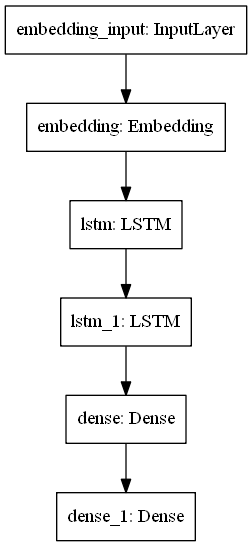

In [17]:
from tensorflow import keras
from keras.utils.vis_utils import plot_model

keras.utils.plot_model(model, to_file='plot.png', show_layer_names=True)

In [18]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("next_words.h5", monitor='loss', verbose=1, save_best_only=True)
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))
model.fit(X, y, epochs=20, batch_size=64, callbacks=[checkpoint])

Epoch 1/20
1703/1703 [==============================] - 774s 452ms/step - loss: 6.3921

Epoch 00001: loss improved from inf to 6.39205, saving model to next_words.h5
Epoch 2/20
1703/1703 [==============================] - 750s 441ms/step - loss: 5.8096

Epoch 00002: loss improved from 6.39205 to 5.80959, saving model to next_words.h5
Epoch 3/20
1703/1703 [==============================] - 737s 432ms/step - loss: 5.4788

Epoch 00003: loss improved from 5.80959 to 5.47879, saving model to next_words.h5
Epoch 4/20
1703/1703 [==============================] - 717s 421ms/step - loss: 5.2062

Epoch 00004: loss improved from 5.47879 to 5.20625, saving model to next_words.h5
Epoch 5/20
1703/1703 [==============================] - 756s 444ms/step - loss: 4.9698

Epoch 00005: loss improved from 5.20625 to 4.96976, saving model to next_words.h5
Epoch 6/20
1703/1703 [==============================] - 809s 475ms/step - loss: 4.7468

Epoch 00006: loss improved from 4.96976 to 4.74681, saving model t

<h3>Prediction</h3>

In [19]:
from tensorflow.keras.models import load_model
import numpy as np
import pickle

# Load the model and tokenizer
model = load_model('next_words.h5')
tokenizer = pickle.load(open('token.pkl', 'rb'))

def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predicted_word = ""
  
  for key, value in tokenizer.word_index.items():
      if value == preds:
          predicted_word = key
          break
  
  print(predicted_word)
  return predicted_word

In [20]:
while(True):
  text = input("Enter your line: ")
  
  if text == "0":
      print("Execution completed.....")
      break
  
  else:
      try:
          text = text.split(" ")
          text = text[-3:]
          print(text)
        
          Predict_Next_Words(model, tokenizer, text)
          
      except Exception as e:
        print("Error occurred: ",e)
        continue

Enter your line: us makes us stronger
['makes', 'us', 'stronger']
so
Enter your line: us makes us stronger
['makes', 'us', 'stronger']
so
Enter your line: us makes us stronger
['makes', 'us', 'stronger']
so
Enter your line: us makes us stronger
['makes', 'us', 'stronger']
so
Enter your line: 0
Execution completed.....
